# **Importing necessary libraires**

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

### **Reading Dataset**

In [2]:
data = pd.read_csv("car data.csv",parse_dates=["Year"])

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014-01-01,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013-01-01,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017-01-01,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011-01-01,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014-01-01,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Car_Name       301 non-null    object        
 1   Year           301 non-null    datetime64[ns]
 2   Selling_Price  301 non-null    float64       
 3   Present_Price  301 non-null    float64       
 4   Driven_kms     301 non-null    int64         
 5   Fuel_Type      301 non-null    object        
 6   Selling_type   301 non-null    object        
 7   Transmission   301 non-null    object        
 8   Owner          301 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 21.3+ KB


In [5]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301,301.000000,301.000000,301.000000,301.000000
mean,2013-08-17 22:53:01.395348736,4.661296,7.628472,36947.205980,0.043189
min,2003-01-01 00:00:00,0.100000,0.320000,500.000000,0.000000
25%,2012-01-01 00:00:00,0.900000,1.200000,15000.000000,0.000000
50%,2014-01-01 00:00:00,3.600000,6.400000,32000.000000,0.000000
75%,2016-01-01 00:00:00,6.000000,9.900000,48767.000000,0.000000
max,2018-01-01 00:00:00,35.000000,92.600000,500000.000000,3.000000
std,NaN,5.082812,8.642584,38886.883882,0.247915


In [6]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [7]:
print("Total unique cars : ",data["Car_Name"].nunique())
print("Total unique fuel types : ",data["Fuel_Type"].nunique())
print("Total unique Owner types : ",data["Owner"].nunique())
print("Total unique selling types : ",data["Selling_type"].nunique())
print("Total unique transmission : ",data["Transmission"].nunique())

Total unique cars :  98
Total unique fuel types :  3
Total unique Owner types :  3
Total unique selling types :  2
Total unique transmission :  2


In [8]:
print("Total unique fuel types :\n",data["Fuel_Type"].value_counts())
print("\nTotal unique Owner types :\n",data["Owner"].value_counts())
print("\nTotal unique selling types :\n",data["Selling_type"].value_counts())
print("\nTotal unique transmission :\n",data["Transmission"].value_counts())

Total unique fuel types :
 Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

Total unique Owner types :
 Owner
0    290
1     10
3      1
Name: count, dtype: int64

Total unique selling types :
 Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64

Total unique transmission :
 Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


# **Data Cleaning**

In [9]:
data['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [14]:
bike_names = [
    'Royal Enfield Thunder 500', 'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
    'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R', 'Royal Enfield Thunder 350',
    'KTM 390 Duke ', 'Mahindra Mojo XT300', 'Bajaj Pulsar RS200', 'Royal Enfield Bullet 350',
    'Royal Enfield Classic 500', 'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
    'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160', 'Bajaj Pulsar 150', 'Honda CBR 150',
    'Hero Extreme', 'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street', 'Yamaha FZ v 2.0',
    'Bajaj Pulsar NS 200', 'Bajaj Pulsar 220 F', 'TVS Apache RTR 180', 'Hero Passion X pro',
    'Bajaj Pulsar NS 200', 'Yamaha Fazer ', 'Honda Activa 4G', 'TVS Sport ', 'Honda Dream Yuga ',
    'Bajaj Avenger Street 220', 'Hero Splender iSmart', 'Activa 3g', 'Hero Passion Pro',
    'Honda CB Trigger', 'Yamaha FZ S ', 'Bajaj Pulsar 135 LS', 'Activa 4g', 'Honda CB Unicorn',
    'Hero Honda CBZ extreme', 'Honda Karizma', 'Honda Activa 125', 'TVS Jupyter',
    'Hero Honda Passion Pro', 'Hero Splender Plus', 'Honda CB Shine', 'Bajaj Discover 100',
    'Suzuki Access 125', 'TVS Wego', 'Honda CB twister', 'Hero Glamour', 'Hero Super Splendor',
    'Bajaj Discover 125', 'Hero Hunk', 'Hero Ignitor Disc', 'Hero CBZ Xtreme', 'Bajaj ct 100','Yamaha FZ  v 2.0',
    'Bajaj Pulsar  NS 200', 'Hero  Ignitor Disc', 'Hero  CBZ Xtreme','Bajaj  ct 100'
]

In [15]:
data = data[~data["Car_Name"].isin(bike_names)]

In [16]:
data["Car_Name"].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'i20', 'grand i10', 'i10', 'eon', 'xcent',
       'elantra', 'creta', 'verna', 'city', 'brio', 'amaze', 'jazz'],
      dtype=object)

## **Exploratory Data Analysis**

In [17]:
copy_data = data.copy()

#### **Univariate Analysis**

<Axes: xlabel='Selling_Price', ylabel='Count'>

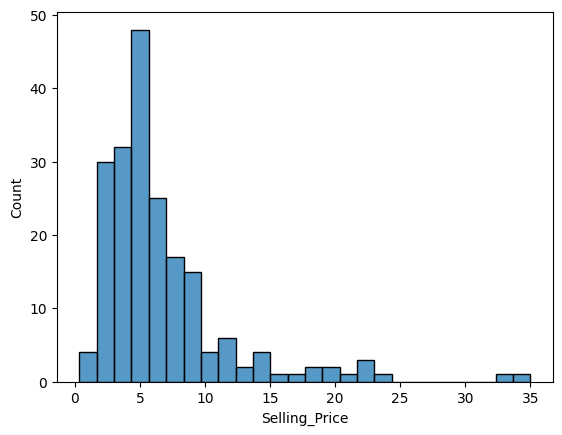

In [18]:
sns.histplot(data=copy_data,x="Selling_Price")

<Axes: xlabel='Present_Price', ylabel='Count'>

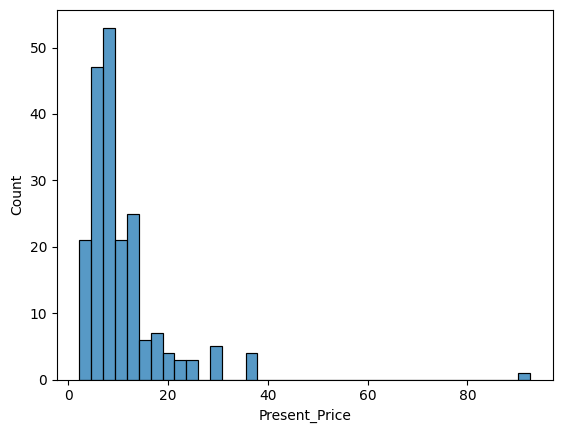

In [19]:
sns.histplot(data=copy_data,x="Present_Price")

<Axes: xlabel='Driven_kms', ylabel='Count'>

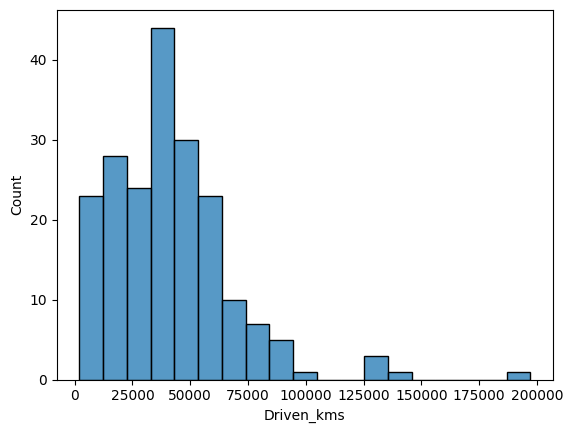

In [20]:
sns.histplot(data=copy_data,x=copy_data["Driven_kms"])

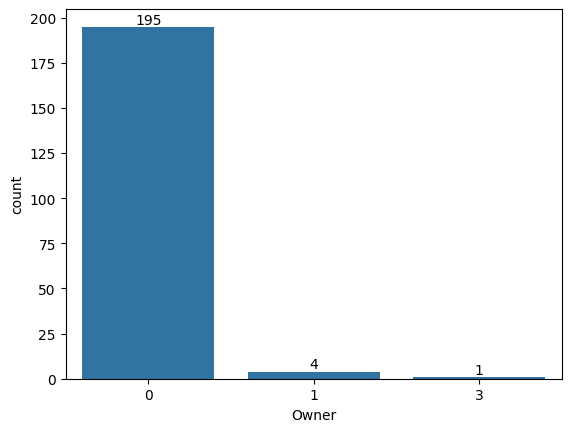

In [21]:
bar = sns.countplot(data=copy_data,x="Owner")
for bars in bar.containers:
    bar.bar_label(bars)

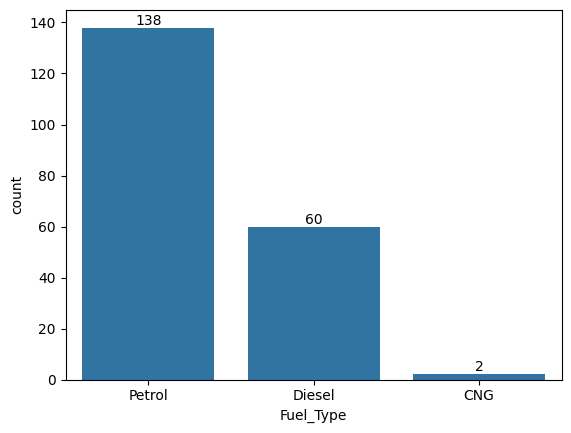

In [22]:
bar = sns.countplot(data=copy_data,x="Fuel_Type")
for bars in bar.containers:
    bar.bar_label(bars)

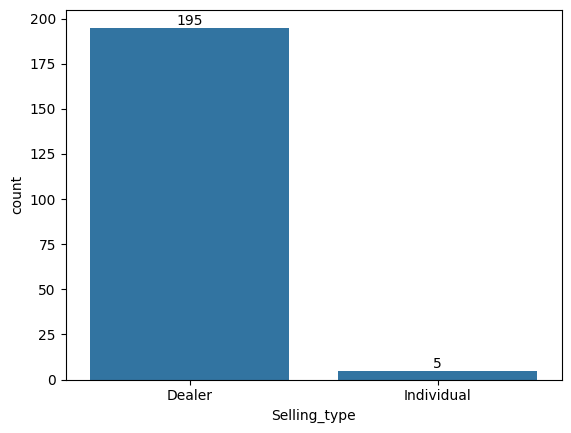

In [23]:
bar = sns.countplot(data=copy_data,x="Selling_type")
for bars in bar.containers:
    bar.bar_label(bars)

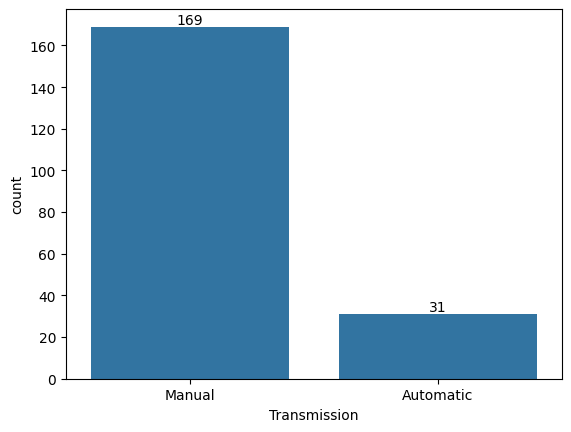

In [24]:
bar = sns.countplot(data=copy_data,x="Transmission")
for bars in bar.containers:
    bar.bar_label(bars)

#### **Bivariate Analysis**

<Axes: xlabel='Selling_Price', ylabel='Present_Price'>

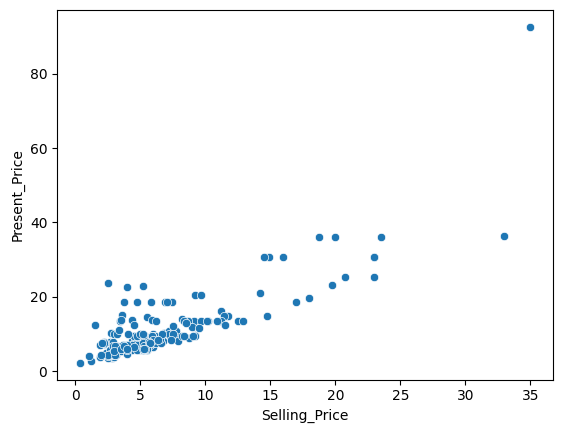

In [25]:
sns.scatterplot(data=copy_data,x="Selling_Price",y="Present_Price")

<Axes: xlabel='Selling_Price', ylabel='Driven_kms'>

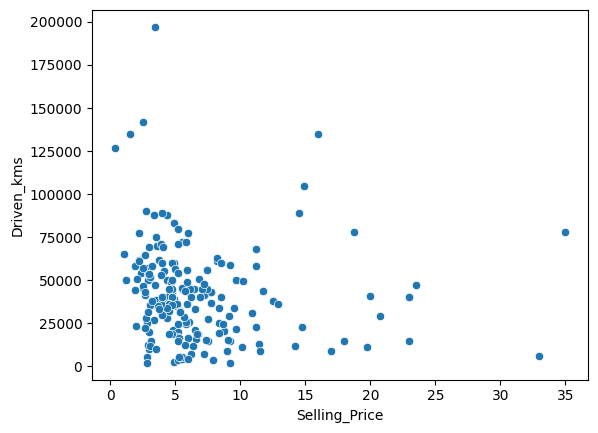

In [26]:
sns.scatterplot(data=copy_data,x="Selling_Price",y="Driven_kms")

<Axes: xlabel='Present_Price', ylabel='Driven_kms'>

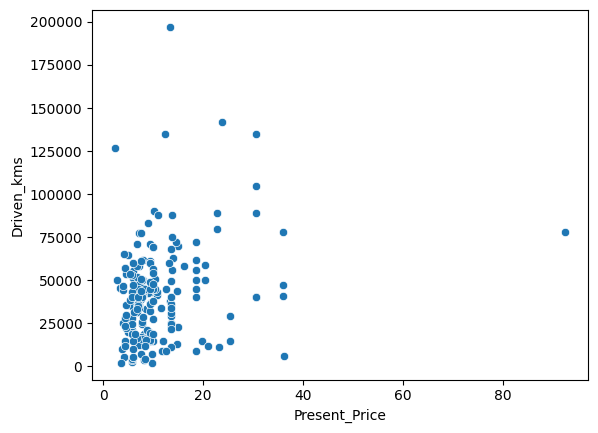

In [27]:
sns.scatterplot(data=copy_data,x="Present_Price",y="Driven_kms")

<Axes: xlabel='Selling_Price', ylabel='Year'>

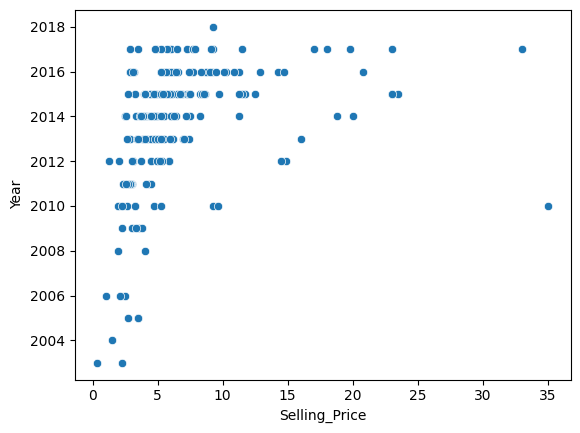

In [28]:
sns.scatterplot(data=copy_data,x="Selling_Price",y="Year")

<Axes: xlabel='Present_Price', ylabel='Year'>

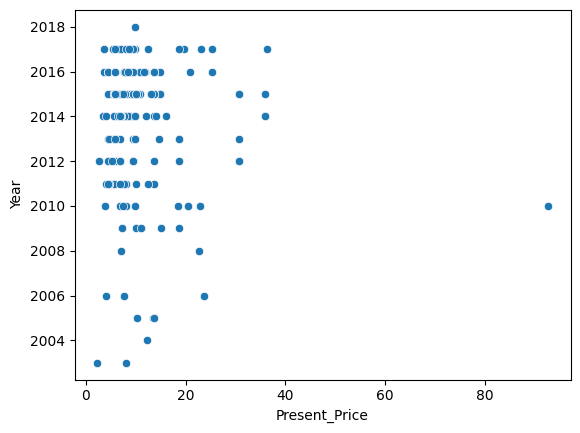

In [29]:
sns.scatterplot(data=copy_data,x="Present_Price",y="Year")

<Axes: xlabel='Year', ylabel='Driven_kms'>

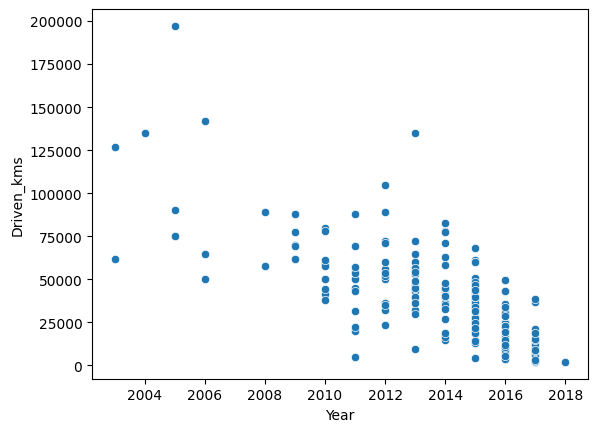

In [30]:
sns.scatterplot(data=copy_data,x="Year",y="Driven_kms")

In [31]:
def encode_categorical_column(df, column_name):

    le = LabelEncoder()
    label = le.fit_transform(df[column_name])
    df.drop(column_name, axis=1, inplace=True)
    df[column_name] = label
    return df

In [32]:
encode_categorical_column(df=copy_data, column_name="Selling_type")
encode_categorical_column(df=copy_data, column_name="Fuel_Type")
encode_categorical_column(df=copy_data, column_name="Transmission")
encode_categorical_column(df=copy_data, column_name="Owner")
encode_categorical_column(df=copy_data, column_name="Car_Name")


,Year,Selling_Price,Present_Price,Driven_kms,Selling_type,Fuel_Type,Transmission,Owner,Car_Name
0,2014-01-01,3.35,5.59,27000,0,2,1,0,29
1,2013-01-01,4.75,9.54,43000,0,1,1,0,32
2,2017-01-01,7.25,9.85,6900,0,2,1,0,7
3,2011-01-01,2.85,4.15,5200,0,2,1,0,35
4,2014-01-01,4.60,6.87,42450,0,1,1,0,31
...,...,...,...,...,...,...,...,...,...
296,2016-01-01,9.50,11.60,33988,0,1,1,0,8
297,2015-01-01,4.00,5.90,60000,0,2,1,0,5
298,2009-01-01,3.35,11.00,87934,0,2,1,0,8
299,2017-01-01,11.50,12.50,9000,0,1,1,0,8


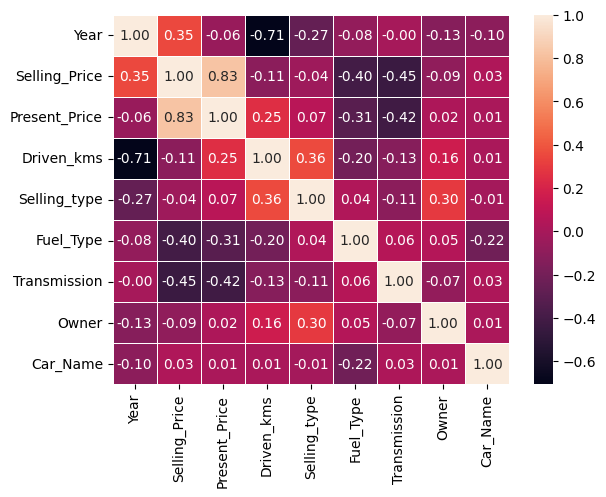

In [33]:
corr = copy_data.corr()
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

# **Machine Learning Models**

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [54]:
X = data.drop("Present_Price",axis=1)
y = data["Present_Price"]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

## **Preprocessing**

In [56]:
numerical_features = X.select_dtypes(include=['int64','float64']).columns
categorical_features = X.select_dtypes(include=["object"]).columns

In [57]:
numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))   
])

In [58]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer,numerical_features),
        ('cat',categorical_transformer,categorical_features)
    ]
)

### **Linear Regression Model**

In [59]:
from sklearn.linear_model import LinearRegression

lr_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',LinearRegression())
])

lr_pipeline.fit(X_train,y_train)
y_pred_lr = lr_pipeline.predict(X_test)

In [60]:
print("Liner Regression :\n")
print("MAE :",mean_absolute_error(y_test,y_pred_lr).round(2))
print("MSE :",mean_squared_error(y_test,y_pred_lr).round(2))
print("R2 Score :",r2_score(y_test,y_pred_lr)*100)

Liner Regression :

MAE : 1.36
MSE : 3.1
R2 Score : 92.43540219122596


### **Random Forest Regressor**

In [61]:
from sklearn.ensemble import RandomForestRegressor

rf_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',RandomForestRegressor(random_state=42))
])

rf_pipeline.fit(X_train,y_train)
y_pred_rf = rf_pipeline.predict(X_test)

In [62]:
print("Random Forest Regressor :\n")
print("MAE :",mean_absolute_error(y_test,y_pred_rf).round(2))
print("MSE :",mean_squared_error(y_test,y_pred_rf).round(2))
print("R2 Score :",r2_score(y_test,y_pred_rf)*100)

Random Forest Regressor :

MAE : 1.19
MSE : 3.1
R2 Score : 92.42822718651618


### **XGBoost Regressor**

In [63]:
from xgboost import XGBRegressor

xgb_model = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',XGBRegressor())
])

xgb_model.fit(X_train,y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [64]:
print("XGBoost Regressor :\n")
print("MAE :",mean_absolute_error(y_test,y_pred_xgb).round(2))
print("MSE :",mean_squared_error(y_test,y_pred_xgb).round(2))
print("R2 Score :",r2_score(y_test,y_pred_xgb)*100)

XGBoost Regressor :

MAE : 1.58
MSE : 5.6
R2 Score : 86.3485494862592


In [65]:
models = ['Linear Regression', 'Random Forest', 'XGBoost']
mae_scores = [mean_absolute_error(y_test, y_pred_lr).round(2), mean_absolute_error(y_test, y_pred_rf).round(2), mean_absolute_error(y_test, y_pred_xgb).round(2)]
mse_scores = [mean_squared_error(y_test, y_pred_lr).round(2), mean_squared_error(y_test, y_pred_rf).round(2), mean_squared_error(y_test, y_pred_xgb).round(2)]
r2_scores = [r2_score(y_test, y_pred_lr)*100, r2_score(y_test, y_pred_rf)*100, r2_score(y_test, y_pred_xgb)*100]

for i in range(len(models)):
    print(f"{models[i]} - MAE: {mae_scores[i]}, MSE: {mse_scores[i]}, R2 Score: {r2_scores[i]}")


Linear Regression - MAE: 1.36, MSE: 3.1, R2 Score: 92.43540219122596
Random Forest - MAE: 1.19, MSE: 3.1, R2 Score: 92.42822718651618
XGBoost - MAE: 1.58, MSE: 5.6, R2 Score: 86.3485494862592


In [66]:
import joblib
joblib.dump(lr_pipeline, 'lr_model.pkl')

loaded_model = joblib.load('lr_model.pkl')